In [3]:
"""
This Notebook has been modified and adapted from the original version provided as part of
Helen Sun's "Hands-On PyTorch Machine Learning" course published on LinkedIn Learning.

I prefer to recreate the exercise files myself rather than working directly with them because
it improves my learning comprehension.
"""

import torch

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler

import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create the training dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

In [5]:
# Create a testing dataset (change train=True to train=False)
testing_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [6]:
indices = list(range(len(training_data)))

# Shuffle the data to prevent any bias that may have come from the ordering of the data
np.random.shuffle(indices)

# Take a small percentage of the training_data for a sample
split = int(np.floor(0.2 * len(training_data)))
training_sample = SubsetRandomSampler(indices[:split])

# This contains the other portion of the training data
validation_sample = SubsetRandomSampler(indices[split:])

In [10]:
# Create the data loaders
train_loader = torch.utils.data.DataLoader(training_data, sampler=training_sample, batch_size=64)
validation_lodaer = torch.utils.data.DataLoader(training_data, sampler=validation_sample, batch_size=64)
test_loader = torch.utils.data.DataLoader(testing_data, batch_size=64, shuffle=True)

# Create a data iterator
data_iterator = iter(train_loader)
images, labels = next(data_iterator)

/tmp/ipykernel_5172/3588078989.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


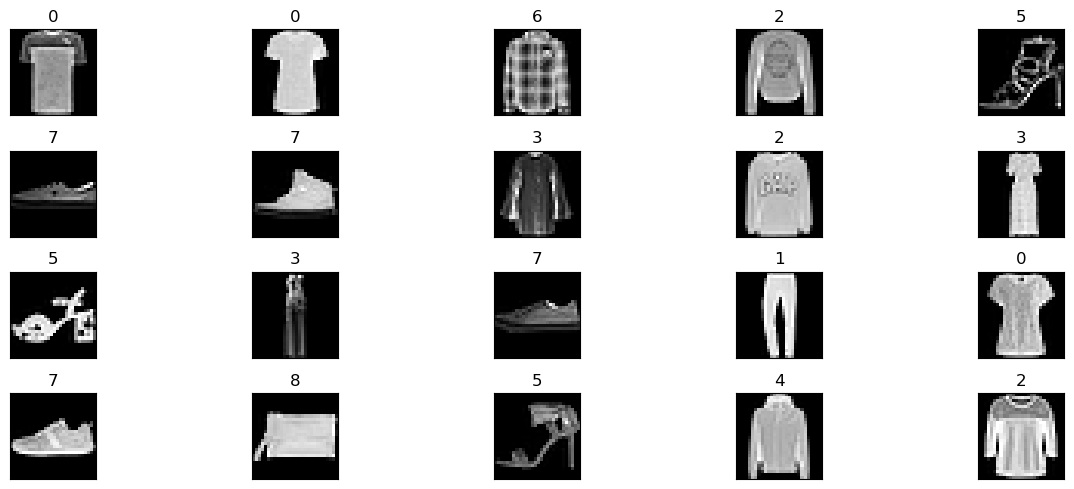

In [15]:
# Plot the data
fig = plt.figure(figsize=(15,5))
for i in np.arange(20):
    ax = fig.add_subplot(4, int(20/4), i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.set_title(labels[i].item())
    fig.tight_layout()